In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
import stackview
import run_roi_count


In [2]:
FOLDER = Path("C:/Users/jmc010/Data/fostrap/FT112/hires")

In [5]:
im = imread(FOLDER / "chan1" / "FT112_1A_s009.png")
im_mask = imread(FOLDER / "chan1" / "FT112_1A_s009_cp_masks.png")

x1, x2, y1, y2 = 3192, 3261, 2963, 3021
im = im[y1:y2, x1:x2]
im_rois = im_mask[y1:y2, x1:x2]

c:\Users\jmc010\AppData\Local\miniconda3\envs\fosquant\Lib\site-packages\imageio\plugins\pillow.py:297: UserWarning: Loading 16-bit (uint16) PNG as int32 due to limitations in pillow's PNG decoder. This will be fixed in a future version of pillow which will make this warning dissapear.
  warnings.warn(


c:\Users\jmc010\AppData\Local\miniconda3\envs\fosquant\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


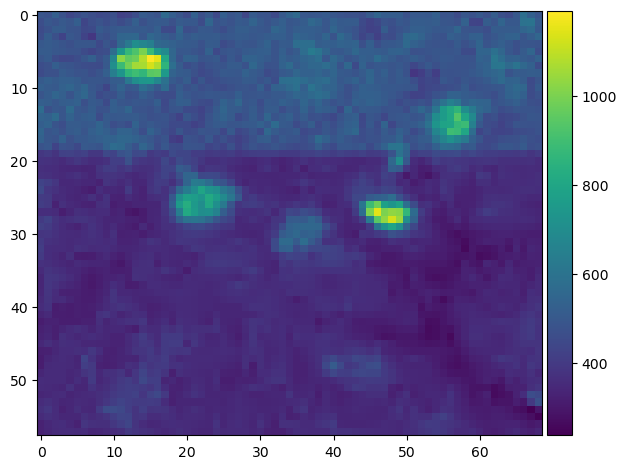

In [7]:
imshow(im)

In [4]:
stackview.curtain(im, im_rois, continuous_update=True, zoom_factor=1, alpha=0.9)


In [ ]:
plt.imshow(im_mask)

In [11]:

def get_mean_rois(im, im_rois):
    im_out = np.zeros_like(im)

    # Find unique region labels (excluding 0)
    unique_labels = np.unique(im_rois)[1:]

    for label in unique_labels:
        im_roi = im_rois == label
        mean = np.mean(im[im_roi])
        im_out += im_roi * int(mean)

    # Ensure im_out is of the same data type as im
    im_out = im_out.astype(im.dtype)

    return im_out

c:\Users\jmc010\AppData\Local\miniconda3\envs\fosquant\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


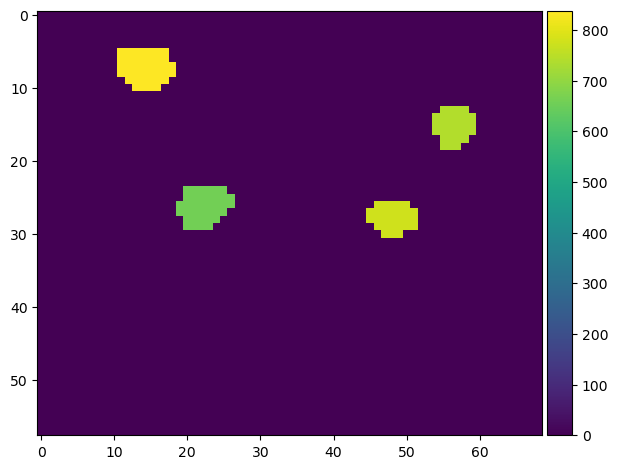

In [10]:
imshow(im_out)

c:\Users\jmc010\AppData\Local\miniconda3\envs\fosquant\Lib\site-packages\imageio\plugins\pillow.py:297: UserWarning: Loading 16-bit (uint16) PNG as int32 due to limitations in pillow's PNG decoder. This will be fixed in a future version of pillow which will make this warning dissapear.
  warnings.warn(
c:\Users\jmc010\AppData\Local\miniconda3\envs\fosquant\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


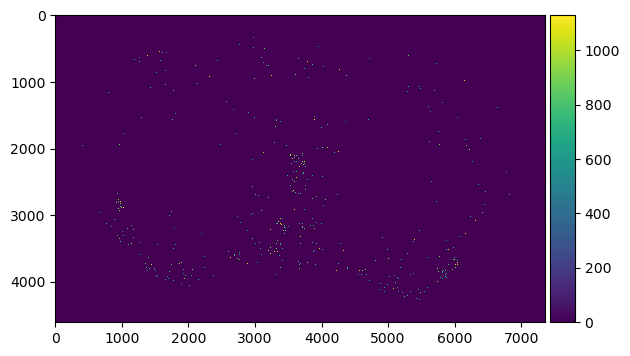

In [12]:
im = imread(FOLDER / "chan1" / "FT112_1A_s009.png")
im_rois = imread(FOLDER / "chan1" / "FT112_1A_s009_cp_masks.png")

imshow(get_mean_rois(im, im_rois))


In [15]:
def get_mean_rois_vect(im, im_rois):
    # Create a mask for pixels that belong to ROIs (excluding background label 0)
    roi_mask = im_rois > 0

    # Calculate the unique labels for the ROIs
    unique_labels = np.unique(im_rois[roi_mask])

    # Calculate the mean values for each ROI
    roi_means = np.array([np.mean(im[im_rois == label]) for label in unique_labels])

    # Create a lookup table to map labels to their corresponding mean values
    lookup_table = np.zeros(im_rois.max() + 1, dtype=roi_means.dtype)
    lookup_table[unique_labels] = roi_means

    # Apply the mean values to the entire image using the lookup table
    im_out = lookup_table[im_rois]

    # Ensure im_out is of the same data type as im
    im_out = im_out.astype(im.dtype)

    return im_out

In [17]:
im = imread(FOLDER / "chan1" / "FT112_1A_s009.png")
im_rois = imread(FOLDER / "chan1" / "FT112_1A_s009_cp_masks.png")

get_mean_rois_vect(im, im_rois)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])